# [TER] ÉTAPE 2: 
LAMOUREUX Léo 21602944 --
PIRES PINTO Lola 21706287


*implémentation des algorithmes avec les paramètres par défault*





---






# ** 1 - CLASSIFICATION, DATASET : BREAST CANCER**

---



*CHARGEMENT DES DONNÉES PUIS CONVERSION EN PD.DATAFRAME*

In [63]:
from sklearn import datasets
import pandas as pd
dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

In [64]:
y = dataset.target
X = df

In [65]:
pd.DataFrame(y).value_counts()

1    357
0    212
dtype: int64

On voit que la classe cible est déséquilibrée.
62,74% de données de classe 1 et 37,26% données de classe 0.
Il faut faire attention a ne pas avoir un split déséquilibré. Pour éviter cela on peut appliquer le paramètre stratify à la cible (y) dans la fonction de split, pour avoir un nombre équilibré de données de chaque classe.

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify = y, test_size = 0.2)

In [67]:
from sklearn.ensemble import RandomForestClassifier
algo = RandomForestClassifier()
algo.fit(X_train,y_train)
print(f"première évaluation du modèle, précision de {algo.score(X_test,y_test)*100:.2f}%")

première évaluation du modèle, précision de 97.37%


précision moyenne de 96.04% avec marge d'erreur de 1.79%



<BarContainer object of 5 artists>

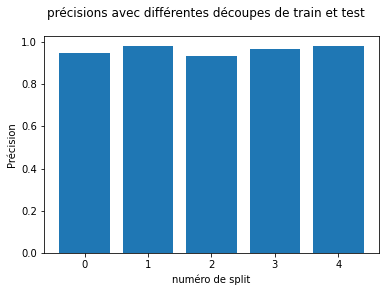

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

nb_cv = StratifiedKFold(5)

scores = cross_val_score(RandomForestClassifier(),X_train,y_train, cv = nb_cv)
print(f"précision moyenne de {scores.mean()*100:.2f}% avec marge d'erreur de {scores.std()*100:.2f}%\n")
plt.suptitle("précisions avec différentes découpes de train et test")
plt.xlabel("numéro de split")
plt.ylabel("Précision")
plt.bar([0,1,2,3,4],scores)

On voit ici que peu importe les différentes partition, le score du modèle ne change pas de manière significative.
Pour la suite on fixera la partition à l'une des 5, pour ne pas qu'elle change a chaque fois.

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 1, stratify = y, test_size = 0.2)
algo.fit(X_train, y_train)

RandomForestClassifier()

[[40  2]
 [ 2 70]]


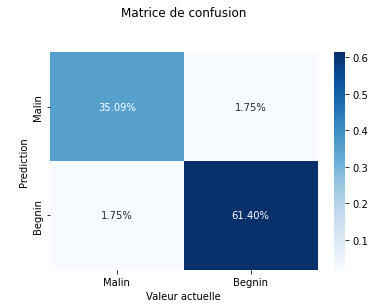

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import numpy as np
cf_matrix = confusion_matrix(y_test, algo.predict(X_test))
print(cf_matrix)
ax = sbn.heatmap(cf_matrix/np.sum(cf_matrix), fmt='.2%', annot=True, cmap='Blues')
ax.set_title('Matrice de confusion\n\n');
ax.set_ylabel('\nPrediction')
ax.set_xlabel('Valeur actuelle');
ax.xaxis.set_ticklabels(['Malin','Begnin'])
ax.yaxis.set_ticklabels(['Malin','Begnin'])
plt.show()

On observe 0.88% de faux positif et 2.63% de faux negatif,
sachant que positif = a une tumeur maligne, et negatif = une tumeur bégnine.

In [71]:
from sklearn.metrics import recall_score, accuracy_score
print(f"recall_score :    {recall_score(y_test,algo.predict(X_test))*100:.2f}% de positifs bien prédits par le modèle")
print(f"accuracy_score :  {accuracy_score(y_test,algo.predict(X_test))*100:.2f}% de prédictions correctes")

recall_score :    97.22% de positifs bien prédits par le modèle
accuracy_score :  96.49% de prédictions correctes


le recall donne le pourcentage de positif bien prédits par le modèle. Plus il est élevé, moins le modèle ne rate de cas positifs (tumeur cancéreuse). C'est donc un l'indicateur le plus important à prendre en compte dans le cadre du cancer, ou minimiser les faux négatifs est vital.



l'accuracy donne le pourcentage de prédictions correctes (positif comme négatif). Il est donc aussi important à prendre en compte, en association avec le recall, pour avoir une vue globale.



---

# REGRESSION, DATASET : DIABETE


---



*CHARGEMENT DES DONNÉES PUIS CONVERSION EN PD.DATAFRAME*

In [72]:
dataset = datasets.load_diabetes()
X = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
y = dataset.target

In [73]:
from sklearn.ensemble import RandomForestRegressor
algo = RandomForestRegressor()
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
algo.fit(X_train,y_train)
print(f"une première évaluation du modèle, précision de {algo.score(X_test,y_test)*100:.2f}%.\nIl décrit {algo.score(X_test,y_test)*100:.2f}% des variations du taux de diabètes")

une première évaluation du modèle, précision de 35.54%.
Il décrit 35.54% des variations du taux de diabètes


précision de 44.01% avec marge d'erreur de 8.08%



<BarContainer object of 5 artists>

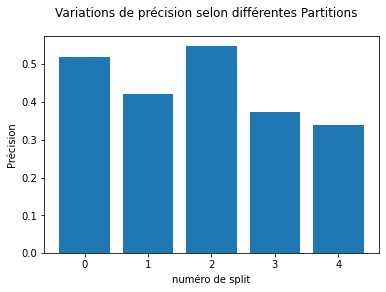

In [74]:
scores = cross_val_score(RandomForestRegressor(),X_train,y_train, cv = 5)
print(f"précision de {scores.mean()*100:.2f}% avec marge d'erreur de {scores.std()*100:.2f}%\n")
plt.xlabel("numéro de split")
plt.ylabel("Précision")
plt.suptitle("Variations de précision selon différentes Partitions")
plt.bar([0,1,2,3,4],scores)

En fonction des partitions les taux de précisions peuvent varier assez fortement, mais aucun n'est précis. La marge d'erreur est forte.

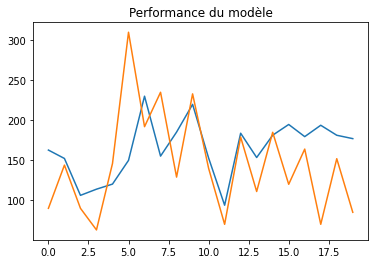

In [75]:
plt.title('Performance du modèle')
plt.plot(list(algo.predict(X_test))[:20])
plt.plot(list(y_test)[:20])

on voit de grosses différences entre les valeurs réelles et les prédictions. Le modèle n'est pas précis.

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 
import statistics
import math
RMSE = math.sqrt(mean_squared_error(y_test,algo.predict(X_test)))
print("MAE = ",mean_absolute_error(y_test,algo.predict(X_test)))
print("MSE = ",mean_squared_error(y_test,algo.predict(X_test)))
print("RMSE = ",math.sqrt(mean_squared_error(y_test,algo.predict(X_test))))
print(f"RMSE = {RMSE:.2f}, moyenne des observation = {statistics.mean(y_test):.2f}")
print(f"RMSE correspond à {(RMSE*100) / statistics.mean(y_test):.2f}% des observations\n")
print("r2_score = ",r2_score(y_test,algo.predict(X_test)))

MAE =  45.25494382022472
MSE =  3158.6945224719107
RMSE =  56.202264389185515
RMSE = 56.20, moyenne des observation = 140.28
RMSE correspond à 40.06% des observations

r2_score =  0.35536843158426346


La MSE penalise beaucoup + les grandes erreurs que la MAE. Dans notre cas on gardera donc la MSE car une grande erreur de prédiction peut etre grave dans le cas du diabete.
On peut voir que la valeur de MSE est très grande et r2_score est bas --> le modèle n'est pas précis.


HISTOGRAMMES DES ERREURS

(array([20., 19., 17., 13., 20., 22., 15., 18.,  9., 15., 15., 12., 18.,
        12., 13., 12.,  7., 13.,  9.,  8.,  1., 10.,  6.,  4.,  3.,  5.,
         9.,  4.,  2.,  3.,  2.,  3.,  3.,  1.,  0.,  1.,  2.,  1.,  1.,
         0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.28  ,  1.6764,  3.0728,  4.4692,  5.8656,  7.262 ,  8.6584,
        10.0548, 11.4512, 12.8476, 14.244 , 15.6404, 17.0368, 18.4332,
        19.8296, 21.226 , 22.6224, 24.0188, 25.4152, 26.8116, 28.208 ,
        29.6044, 31.0008, 32.3972, 33.7936, 35.19  , 36.5864, 37.9828,
        39.3792, 40.7756, 42.172 , 43.5684, 44.9648, 46.3612, 47.7576,
        49.154 , 50.5504, 51.9468, 53.3432, 54.7396, 56.136 , 57.5324,
        58.9288, 60.3252, 61.7216, 63.118 , 64.5144, 65.9108, 67.3072,
        68.7036, 70.1   ]),
 <BarContainer object of 50 artists>)

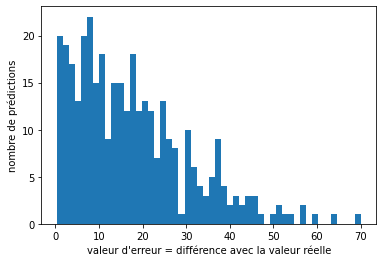

In [77]:
y_pred = algo.predict(X_train)
plt.xlabel("valeur d'erreur = différence avec la valeur réelle")
plt.ylabel("nombre de prédictions")
plt.hist(np.abs(y_train - y_pred), bins = 50)

On voit que beaucoup de prédictions font des erreurs assez grandes. Le modèle fais beaucoup d'erreurs importantes.